
# Exploratory Data Analysis I - Car Sales

## Table of Contents

1. [Problem Statement](#section1)<br>
    - 1.1 [Introduction](#section101)<br/>
    - 1.2 [Data source and dataset](#section102)<br/>
2. [Data Loading and Description](#section2)
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Pre Profiling](#section302)<br/>
    - 3.3 [Initial observations](#section303)<br/>
    - 3.4 [Final observations](#section304)<br/>
4. [Data Normalization](#section4)
    - 4.1 [Standardize all column headers to lower case ](#section401)<br/>
    - 4.2 [Missing Data and its imputation](#section402)<br/>
5. [Conclusions](#section5)

<a id=section1></a>
## 1. Problem Statement

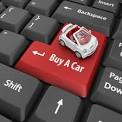

"This dataset was collected by Anton Bobanev from car sale advertisements for study/practice purposes in 2016". 

<a id=section101></a>
## 1.1 Introduction

This Exploratory Data Analysis is to practice Python skills learned till now on a structured data set including loading, inspecting, wrangling, exploring, and drawing conclusions from data. The notebook has observations with each step in order to explain thoroughly how to approach the data set. Based on the observation some questions also are answered in the notebook for the reference though not all of them are explored in the analysis.

This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation.

<a id=section102></a>
## 1.2 Data source and dataset 

a. How was it collected?

Name: "Anton Bobanev from car sale advertisements"
Year: 2016
Description: "This dataset contains data for more than 9.5K cars sale in Ukraine. Most of them are used cars so it opens the possibility to analyze features related to car operation. This dataset was collected by Anton Bobanev from car sale advertisements for study/practice purposes in 2016"

b. Is it a sample? If yes, was it properly sampled?

Yes, it is a sample. We don't have official information about the data collection method, but it appears not to be a random sample, so we can assume that it is not representative.

<a id=section2></a>
## 2. Data Loading and Description


The dataset comprises of __9576 observations of 10 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                                   |
| ------------- |:-------------------------------------------------------------:| 
| car           | manufacturer brand                                            | 
| price         | seller’s price in advertisement (in USD)                      |  
| body          | car body type                                                 | 
| mileage       | as mentioned in advertisement (‘000 Km)                       |   
| engV          | rounded engine volume (‘000 cubic cm)                         |
| engType       | type of fuel (“Other” in this case should be treated as NA)   |
| registration  | whether car registered in Ukraine or not                      |
| year          | year of production                                            |
| model         | specific model name                                           |
| drive         | drive type                                                    |

#### Import Packages

In [1]:
import numpy as np                                  # Implemennts milti-dimensional array and matrices
import pandas as pd                                 # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns           # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)  

from subprocess import check_output

#### Importing datasets

In [2]:
carsales_data = pd.read_csv("https://raw.githubusercontent.com/ravikumarsahu/Term-1/master/Data/Projects/car_sales_new.csv")     # Importing training dataset using pd.read_csv

<a id=section3></a>
## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

<a id=section301></a>
### 3.1 Understanding the Dataset

To gain insights from data we must look into each aspect of it very carefully. We will start with observing few rows and columns of data both from the starting and from the end

In [3]:
carsales_data.columns                                                  # This will print the names of all columns.

Index(['car', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'model', 'drive'],
      dtype='object')

In [4]:
carsales_data.shape                                         # This will print the number of rows and comlumns of the Data Frame

(9576, 10)

carsales_data has __9576 rows__ and __10 columns.__

In [5]:
carsales_data.dtypes 

car              object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
year              int64
model            object
drive            object
dtype: object

In [6]:
carsales_data.head()                                                   # This will print the First n rows of the Data Frame

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [7]:
carsales_data.tail()                                                   # This will print the last n rows of the Data Frame

,car,price,body,mileage,engV,engType,registration,year,model,drive
9571,Hyundai,14500.0,crossover,140,2.0,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,150,1.6,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,180,3.5,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,150,3.5,Gas,yes,2008,ES 350,front
9575,Audi,22500.0,other,71,3.6,Petrol,yes,2007,Q7,full


In [8]:
carsales_data.info()                                                   # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
car             9576 non-null object
price           9576 non-null float64
body            9576 non-null object
mileage         9576 non-null int64
engV            9142 non-null float64
engType         9576 non-null object
registration    9576 non-null object
year            9576 non-null int64
model           9576 non-null object
drive           9065 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [9]:
carsales_data.describe(include='all')                                                   

,car,price,body,mileage,engV,engType,registration,year,model,drive
count,9576,9576.000000,9576,9576.000000,9142.000000,9576,9576,9576.000000,9576,9065
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,936,NaN,3646,NaN,NaN,4379,9015,NaN,199,5188
mean,NaN,15633.317316,NaN,138.862364,2.646344,NaN,NaN,2006.605994,NaN,NaN
std,NaN,24106.523436,NaN,98.629754,5.927699,NaN,NaN,7.067924,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,70.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9200.000000,NaN,128.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16700.000000,NaN,194.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [10]:
carsales_data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

From the above output we can see that engV and drive columns contains maximum null values. We will see how to deal with them.

In [11]:
total = carsales_data.isnull().sum().sort_values(ascending=False)
percent = (carsales_data.isnull().sum()/carsales_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

              Total   Percent
drive           511  0.053363
engV            434  0.045322
model             0  0.000000
year              0  0.000000
registration      0  0.000000
engType           0  0.000000
mileage           0  0.000000
body              0  0.000000
price             0  0.000000
car               0  0.000000


<a id=section302></a>
### 3.2 Pre Profiling

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [12]:
profile = pandas_profiling.ProfileReport(carsales_data)
profile.to_file(outputfile="carsales_data_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __carsales_data_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it.

<a id=section303></a>
### 3.3. Initial observations:
- Summary of data types in this dataset:
 - <em>Numeric</em>: <strong>price</strong> (Float),<strong>Mileage</strong> (integer), <strong>engV</strong> (Float), <strong>Year</strong> (integer)
 - <em>Object</em>: Everything else
 
 - <strong>price</strong> has some values 0 that are too low to be real price. 
 - <strong>mileage</strong> has some values 0 that are too low to be real mileage. 
 - The following variables have null values that may need to addressed.
 - <strong>drive</strong>: There are 511 missing values. We need to find why.
 - <strong>engV</strong>:  There are 434 missing values. We need to find why.

Explore the numeric variable price to find if any are NaN.                                       

In [13]:
print("'price'")                                                                
print("Minimum price: ", carsales_data["price"].min())
print("Maximum price: ", carsales_data["price"].max())
print("How many values are NaN?: ", pd.isnull(carsales_data['price']).sum())
print("How many values are 0? : ",carsales_data.price[carsales_data.price == 0].count())


'price'
Minimum price:  0.0
Maximum price:  547800.0
How many values are NaN?:  0
How many values are 0? :  267


In [14]:
print("'Mileage'")                                                                
print("Minimum Mileage: ", carsales_data["mileage"].min())
print("Maximum Mileage: ", carsales_data["mileage"].max())
print("How many values are NaN?: ", pd.isnull(carsales_data['mileage']).sum())
print("How many values are 0? : ",carsales_data.price[carsales_data.mileage == 0].count())

'Mileage'
Minimum Mileage:  0
Maximum Mileage:  999
How many values are NaN?:  0
How many values are 0? :  348


<a id=section304></a>
### 3.4. Final observations

Variables to transform prior to analysis:
- Standardize all column headers to lower case (to prevent typos!)
- Price & Mileage: remove outliers as it is visible that the columns have outlier as 0.

It will be important to decide how to handle NaN values.

<a id=section4></a> 
## 4. Data Normalization

<a id=section401></a> 
### 4.1. Standardize all column headers to lower case 

In [15]:

carsales_data.columns = map(str.lower, carsales_data.columns)           # map() function returns a list of results after applying the given function
                                                                         # to each item of a given iterable.
carsales_data.dtypes                                                                # Confirm that all variable names are now lower case

car              object
price           float64
body             object
mileage           int64
engv            float64
engtype          object
registration     object
year              int64
model            object
drive            object
dtype: object

<a id=section402></a>
### 4.2. Missing Data and its imputation

In [16]:
carsales_data['drive'] = carsales_data['drive'].fillna("UnSpecified")
carsales_data.drive.unique()

array(['full', 'rear', 'front', 'UnSpecified'], dtype=object)

In [18]:
# Replace all missing values with NaN,later will replace with median values of grouped cars.
#carsales_data.engV = carsales_data.engV.fillna('NaN')

#cars_groupby = carsales_data.groupby((['car' , 'model']))

## Comments below lines of code because it took time to process.We are saving processed data in csv format,so will 
## use for future.
#for (rows,cols) in carsales_data.iterrows() :
       
#        for name, group in cars_groupby:
            
#            if (name[0] == cols.car) & (cols.mileage == 0) :
#                 carsales_data['mileage'].replace(to_replace=cols.mileage, value=group.mileage.median(), inplace=True)

######   Replacing all engV missing values with  median values #####

#for (rows,cols) in carsales_data.iterrows() :
       
#        for name, group in cars_groupby:
            
#            if (name[0] == cols.car) & (cols.engV == 'NaN') :
#                carsales_data['engV'].replace(to_replace=cols.engV, value=group.engV.median(), inplace=True)
                #print(cols.engV)
         
        
#carsales_data.to_csv("postprocessing_car_sales.csv", sep=',', encoding='utf-8')



In [ ]:
#Mileage
mileage_avg = sum(carsales_data['mileage']) / len(carsales_data['mileage'])
carsales_data['mileage_level'] = ["high mileage" if i > mileage_avg else "low mileage" for i in carsales_data['mileage']]
carsales_data.loc[:10]

#### Post Profiling

In [19]:
carsales_data = pd.read_csv("postprocessing_car_sales.csv")     # Importing training dataset using pd.read_csv
profile = pandas_profiling.ProfileReport(carsales_data)
profile.to_file(outputfile="carsales_data_postprocessing.html")

### GRAPHS

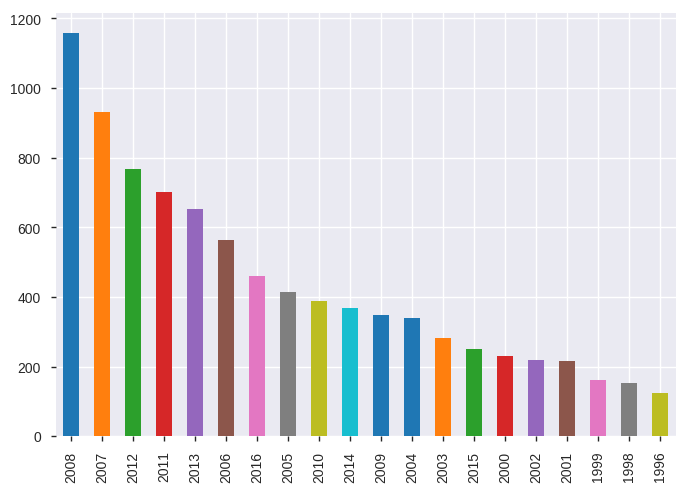

In [20]:
carsales_data['year'].value_counts().head(20).plot.bar()

Variation of the price range by the vehicle type

Observation:Year 2008 has the highest number of car sales record.

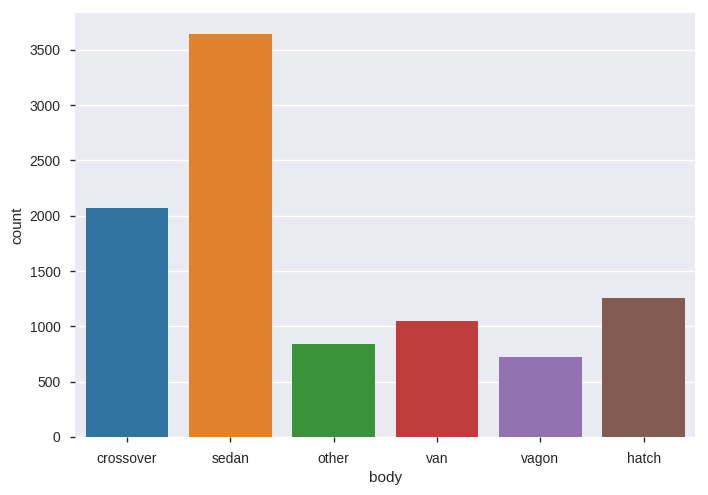

In [21]:
sns.countplot(carsales_data['body'])

Observation:Sedan are most preferred private cars. among public vehicles vans are preferred.

In [ ]:
sns.boxplot(x='registration',y='price',hue='mileage_level',data=carsales_data)

In [ ]:
carsales_data.columns   

In [ ]:
from collections import Counter
country_count = Counter(carsales_data['car'].dropna().tolist()).most_common(15)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
print(country_idx)
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Top fiveteen Car brands')
plt.xlabel('Car brand')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Observation:Volkswagen and Mercedes-Benz cars are the most popular car brand. followed by brand like BMW, Toyota etc.

In [ ]:
ct = pd.value_counts(carsales_data['engtype'].values, sort=False)
labels = carsales_data['engtype'].unique()
labels.sort()
sizes = ct
ct.sort_index(inplace=True)
colors = ['red', 'pink', 'green', 'blue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

Observation:Petrol cars are the most widely sold Engine Type. Gas and Other fuels are not so commonly used.

In [ ]:
carsales_data['drive'] = carsales_data['drive'].fillna("UnSpecified")
carsales_data.drive.unique()

In [ ]:
carsales_data.sample(100).plot.scatter(x='mileage', y='price')
sns.regplot(x='mileage',y='price',data=carsales_data)

Observation:Mileage and price are indirectly related. high priced cars give low mileage.

In [ ]:
carsales_data.plot(kind = 'scatter', x='year', y = 'price', alpha = 0.5, color = 'y')
plt.xlabel("year")
plt.ylabel("price")
plt.title("year - price Scatter Plot")
plt.show()

Observation:In Genaral price of all cars have increased over the period of time. Cars are costing more in recent years.

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]

sns.barplot(x="engtype", y="price", hue= "drive", palette="husl",data=carsales_data)
ax.set_title("Average price of vehicles by fuel type and drive",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()


Observation: Full drive cars of all engine type cars are high priced compared to other fuel types.Petrol and Diesel all types of car drives are almost equally priced.

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="car", y="price", hue= "mileage_level", palette="husl",data=carsales_data)
ax.set_title("Average price of vehicles by fuel type and drive",fontdict= {'size':12})
ax.xaxis.set_label_text("Car make",fontdict= {'size':10})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':10})
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

Observation:High mileage cars are highly priced.

In [ ]:
#Average price of vehicle by fuel type

# barplot for price based on fuel type and gearbox type
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="engtype", y="price", palette="husl",data=carsales_data)
ax.set_title("Average price of vehicles by fuel typ",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.show()

Observation:Diesel vehicals are highly priced.

In [ ]:
# barplot for price based on fuel type and gearbox type
fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="engtype", y="mileage", palette="husl",data=carsales_data)
ax.set_title("Average price of vehicles by fuel typ",fontdict= {'size':12})
ax.xaxis.set_label_text("Type Of Fuel",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Mileage",fontdict= {'size':14})
plt.show()

In [ ]:
carsales_data.quantile([0,.25, .5, .75,1])

Observation: Low engine volume petrol cars are most preferred. followed by the Diesel and Gas cars under the same category.

In [ ]:
carsales_data['mileage_cat'] = pd.cut(carsales_data.mileage, [0,200,400,600,800,1000], labels=['<200','200-400','400-600','600-800','800+'],  include_lowest=True)
fig,ax =plt.subplots(figsize=(8,6))
sns.countplot(data = carsales_data,x = 'mileage_cat',hue='drive')
plt.title('Mileage vs Car drive')

Observation: low mileage(0-400) front drive cars are most prefered. next is the Full drive car with very low mileage(<200).

In [ ]:
usa = carsales_data.loc[carsales_data['car'] == 'Volkswagen']
top_10_model = usa['model'].value_counts()[:10].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_model['model'],top_10_model.index,palette="PuBuGn_d")
plt.title('Top 10 Volkswagen model in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()


In [ ]:
usa1 = carsales_data.loc[carsales_data['car'] == 'Mercedes-Benz']
top_10_model1 = usa1['model'].value_counts()[:10].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_model1['model'],top_10_model1.index,palette="PuBuGn_d")
plt.title('Top 10 Mercedes-Benz model in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

Observation: Touareg & E-Class is the most prefered model in Volkswagen and Mercedes-Benz companies respectively.

In [ ]:
usa = carsales_data.loc[carsales_data['car'] == 'Volkswagen']
top_10_model = usa['drive'].value_counts()[:].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_model['drive'],top_10_model.index,palette="PuBuGn_d")
plt.title('Volkswagen car drive types in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

In [ ]:
usa1 = carsales_data.loc[carsales_data['car'] == 'Mercedes-Benz']
top_10_model1 = usa1['drive'].value_counts()[:].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_model1['drive'],top_10_model1.index,palette="PuBuGn_d")
plt.title(' Mercedes-Benz car drive types in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

Observation:front and rear drive is most preferred in Volkswagen and Mercedes-Benz companies respectively.

In [ ]:
usa1 = carsales_data.loc[carsales_data['car'] == 'Mercedes-Benz']
top_10_model1 = usa1['engtype'].value_counts()[:].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_model1['engtype'],top_10_model1.index,palette="PuBuGn_d")
plt.title('Mercedes-Benz car fuel types in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

In [ ]:
usa = carsales_data[carsales_data['car'] == 'Volkswagen']
top_10_model = usa['engtype'].value_counts()[:].to_frame()
plt.figure(figsize=(10,5))
sns.barplot(top_10_model['engtype'],top_10_model.index,palette="PuBuGn_d")
plt.title('Volkswagen car fuel types in terms of contribution',fontsize=18,fontweight="bold")
plt.xlabel('')
plt.show()

Observation:Diesel engines are most preferred in Volkswagen and Mercedes-Benz car companies.

In [ ]:
corr = carsales_data.loc[:,carsales_data.dtypes != 'object'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

Observation:price, mileage and year are correalated with each other.

In [ ]:
corr=carsales_data.corr()['mileage']
corr[np.argsort(corr,axis=0)[::-1]]

In [ ]:
features_correlation = carsales_data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

Observation: Mileage, price,year,drive, engive Volume are correalated with each other.

In [ ]:
ax = sns.violinplot(x="drive", y="price",hue='mileage_level', palette="gnuplot", data=carsales_data)
plt.xlabel("Car drive")
plt.ylabel("price")
plt.title("Car drive Vs. price", fontsize=18, fontweight = "bold")

Observation: In front drive, low mileage car are highly priced. 
             In Full drive, low mileage car are less priced. 
             In Rear drive, high mileage cars are mid priced.

In [ ]:
ax = sns.violinplot(x="engtype", y="price",hue='mileage_level', palette="gnuplot", data=carsales_data)
plt.xlabel("Car fuel type")
plt.ylabel("price")
plt.title("Car fuel type Vs. price", fontsize=18, fontweight = "bold")

In [ ]:
carsales_data['drive'].value_counts().plot(kind='bar')

In [ ]:
carsales_plot = carsales_data[(carsales_data['mileage']> 200)]
fig,ax = plt.subplots(figsize=(10,6))
sns.countplot(x='car',data=carsales_plot,hue='mileage_level')
plt.xlabel("Car")
plt.ylabel("Count")
plt.title("Mileage level vs Cars", fontsize=18, fontweight = "bold")
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

Observation :- Benz and Volkswagan have better mileage.

<a id=section5></a>
## 5. Conclusion

- The Car sales Survrey being conducted helps us to know the most prefered car brand and features affecting it.
- Diesels cars are highly priced.
- In Front drive cars low mileage cars are highly priced.
- From the analyis, it was concluded that Volkswagen front drive Diesel cars are most prefered.Followed by Mercedes-Benz rear drive Diesel cars due to their features.